# Import Libraries

In [126]:
import pandas as pd
import numpy as np
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from math import radians, cos, sin, asin, sqrt
import warnings
warnings.filterwarnings('ignore')

In [127]:
data = pd.read_csv('C:/Users/198r1/Downloads/Resources-NYC Taxi Trip Project/nyc_taxi_trip_duration.csv')
data=data.iloc[0:60000,]

In [63]:
data.shape

(60000, 11)

In [64]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Evaluation metrics mse is used

# Benchmark Model

In [65]:
from sklearn.utils import shuffle

data = shuffle(data, random_state = 46)
div = int(data.shape[0]/4)
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

In [66]:
test['mean'] = train['trip_duration'].mean()

In [67]:
from sklearn.metrics import mean_squared_error as MSE

simple_mean_error = MSE(test['trip_duration'] , test['mean'])
simple_mean_error

7219572.391165031

In [68]:
Vendor_id = pd.pivot_table(train, values='trip_duration', index = ['vendor_id'], aggfunc=np.mean)
Vendor_id

trip_duration
vendor_id               
1             984.914585
2            1101.789569

In [69]:
test['Vendor_id_mean'] = 0                                                                        

for i in train['vendor_id'].unique():
    test['Vendor_id_mean'][test['vendor_id'] == str(i)] = train['trip_duration'][train['vendor_id'] == str(i)].mean()

In [70]:
Vendor_id_mean = MSE(test['trip_duration'] , test['Vendor_id_mean'] )
Vendor_id_mean

8039257.369919313

In [71]:
passenger_count = pd.pivot_table(train, values='trip_duration', index = ['passenger_count'], aggfunc=np.mean)
passenger_count

trip_duration
passenger_count               
0                   981.000000
1                  1053.279144
2                  1030.852521
3                  1066.706912
4                  1114.894841
5                  1029.894003
6                   962.407925

In [72]:
test['passenger_count_mean'] = 0

for i in train['passenger_count'].unique():
    test['passenger_count_mean'][test['passenger_count'] == str(i)] = train['trip_duration'][train['passenger_count'] == str(i)].mean()

In [73]:
passenger_count_error = MSE(test['trip_duration'] , test['passenger_count_mean'] )
passenger_count_error

8039257.369919313

In [74]:
vendor_id_peassenger_count = pd.pivot_table(train, values = 'trip_duration', index = ['vendor_id','passenger_count'], aggfunc = np.mean)
vendor_id_peassenger_count

trip_duration
vendor_id passenger_count               
1         0                   981.000000
          1                   997.583062
          2                   924.711202
          3                   965.153477
          4                   900.425837
          5                   954.333333
          6                  1374.000000
2         1                  1117.184729
          2                  1110.890453
          3                  1125.037190
          4                  1266.840678
          5                  1030.211485
          6                   961.446262

In [75]:
test['Super_mean'] = 0
s2 = 'vendor_id'
s1 = 'passenger_count'
for i in test[s1].unique():
  
  for j in test[s2].unique():
    test['Super_mean'][(test[s1] == i) & (test[s2]==str(j))] = train['trip_duration'][(train[s1] == i) & (train[s2]==str(j))].mean()

In [76]:
super_mean_error = MSE(test['trip_duration'] , test['Super_mean'] )
super_mean_error

8039257.369919313

# K-Nearest neighbours’ model

In [77]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [78]:
x = data.drop(['trip_duration','id','pickup_datetime','dropoff_datetime','pickup_latitude','pickup_longitude','dropoff_longitude','dropoff_latitude','store_and_fwd_flag'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((60000, 2), (60000,))

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [80]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 59)

In [81]:
reg = KNN(n_neighbors = 6)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     8331585.2676907405


In [89]:
def Elbow(K):
    test_mse = []
  
  
    for i in K:
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse
k = range(1,50)

In [90]:
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

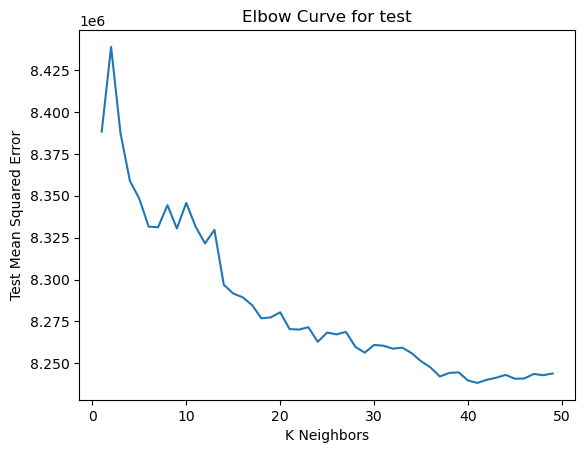

In [91]:
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [92]:
reg = KNN(n_neighbors = 6)

reg.fit(train_x, train_y)

test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     8331585.2676907405


In [93]:
test.index(min(test))

40

In [94]:
value_min=test.index(min(test))

reg = KNN(n_neighbors = value_min)

reg.fit(train_x, train_y)

test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     8239667.543071167


In [118]:
knn_train_score = reg.score(train_x,train_y)
knn_train_score*100

-0.017802886756501657

In [119]:
knn_test_score = reg.score(test_x,test_y)
knn_test_score*100

-0.04353910452123966

# Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

In [96]:
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

In [97]:
train_predict = lr.predict(train_x)
k = mse(train_predict, train_y)
print('Training Mean Squared Error', k )

Training Mean Squared Error 93274589.96020338


In [98]:
test_predict = lr.predict(test_x)
k = mse(test_predict, test_y)
print('Test Mean Squared Error    ', k )

Test Mean Squared Error     8231271.556269055


In [115]:
#calculating the train score 

linear_train_score = lr.score(train_x,train_y)
linear_train_score*100


0.004457898536325278

In [116]:
#calculating the test score

linear_test_score = lr.score(test_x,test_y)
linear_test_score*100

0.058402415517933015

# Decision Tree model

In [99]:
from sklearn.tree import DecisionTreeRegressor as DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
regressor = DecisionTreeRegressor()
regressor.fit(x, y)

DecisionTreeRegressor()

In [102]:
from math import sqrt
train_predict = regressor.predict(train_x)
k = mse(train_predict,train_y)
print("training mse ",k)

training mse  93274717.404795


In [103]:
from math import sqrt
test_predict = regressor.predict(test_x)
k1 = mse(test_predict,test_y)
print("testing mse ",k1)

testing mse  8226472.095733292


In [104]:
x.columns

Index(['vendor_id', 'passenger_count'], dtype='object')

In [105]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


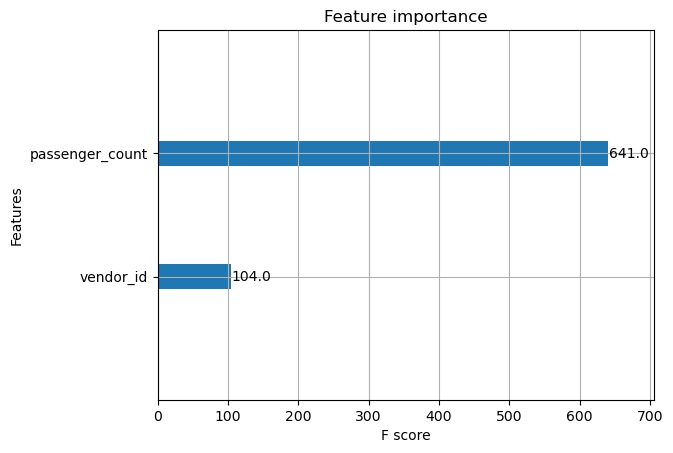

In [106]:
#Using XGBoost in order to interpret the variable importance
from xgboost import XGBRegressor
from xgboost import plot_importance
import matplotlib.pyplot as plt
model = XGBRegressor()
model.fit(x,y)
plot_importance(model)
plt.show()

In [107]:
#calculating the train score of decision tree model
decision_train_score = regressor.score(train_x,train_y)
decision_train_score*100

0.004321270854190651

In [117]:
#calculating the test score of decision tree model
decision_test_score = regressor.score(test_x,test_y)
decision_test_score*100

0.11667600668896494

# Bar plot

In [120]:
decision_train_score,linear_train_score,knn_train_score

(4.321270854190651e-05, 4.4578985363252777e-05, -0.00017802886756501657)

In [121]:
#assining the train score values in x,y
x=["decision_train_score","linear_train_score","knn_train_score"]
y=[0.9999996442282492, 0.005868613774166032, 0.22451293627095015]

In [122]:
knn_test_score, linear_test_score,decision_test_score

(-0.0004353910452123966, 0.0005840241551793302, 0.0011667600668896494)

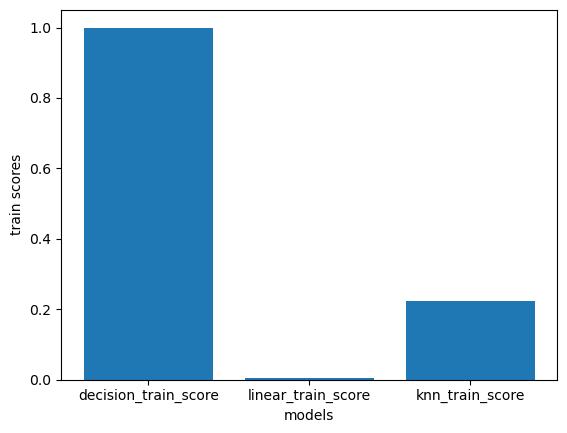

In [123]:
plt.figure(dpi=100)
plt.bar(x,y)
plt.xlabel("models")
plt.ylabel("train scores")
plt.show()

In [124]:
#assining the test score value in x1,y1
x1=["knn_test_score","linear_test_score","decision_test_score"]
y1=[-0.16425004050105008,0.00719197085905432,0.9999989502319949]

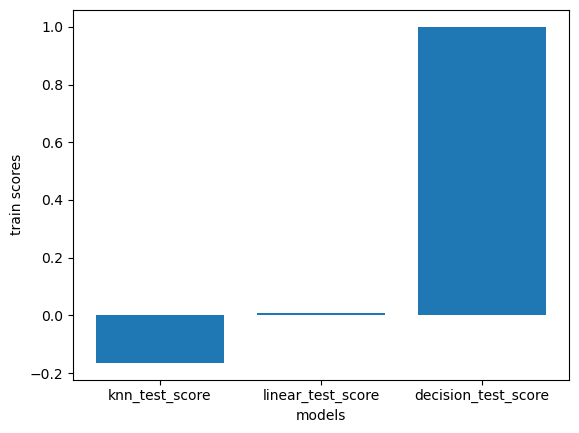

In [125]:
plt.figure(dpi=100)
plt.bar(x1,y1)
plt.xlabel("models")
plt.ylabel("train scores")
plt.show()